ROLL NO: 20K-0374

BCS-7A

I have taken the dataset if breast Cancer. The Breast Cancer Wisconsin (Diagnostic) dataset is a classic dataset used for binary classification tasks, specifically for distinguishing between malignant (M) and benign (B) tumors based on features computed from cell nuclei characteristics.

Now, let's proceed with implementing AdaBoost on this dataset. The code will use a simple decision stump as the weak learner.

In [1]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the Breast Cancer Wisconsin dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
df = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Convert diagnosis (M/B) to binary labels (1/0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [4]:
# Drop ID column
df.drop('ID', axis=1, inplace=True)

In [5]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize weights
df['weights'] = 1 / df.shape[0]


In [8]:
# Function to train a weak learner (Logistic Regression)
def train_weak_learner(X, y, weights):
    model = LogisticRegression()  # Use Logistic Regression as the weak learner
    model.fit(X, y, sample_weight=weights)
    return model

In [9]:
# Function to compute the weighted error of a weak learner
def compute_error(y_true, y_pred, weights):
    error = np.sum(weights * (y_true != y_pred))
    return error / np.sum(weights)

In [10]:
# Function to update weights based on the weak learner's performance
def update_weights(weights, alpha, y_true, y_pred):
    weights *= np.exp(-alpha * y_true * y_pred)
    weights /= np.sum(weights)
    return weights

In [11]:
# Function to perform AdaBoost training
def adaboost_train(X, y, num_estimators):
    n_samples, n_features = X.shape
    weights = np.ones(n_samples) / n_samples  # Initialize weights uniformly

    models = []  # List to store weak learners
    alphas = []  # List to store corresponding alpha values

    for _ in range(num_estimators):
        # Train a weak learner
        model = train_weak_learner(X, y, weights)

        # Make predictions
        y_pred = model.predict(X)

        # Compute weighted error
        error = compute_error(y, y_pred, weights)

        # Avoid division by zero
        error = max(error, 1e-10)

        # Compute alpha
        alpha = 0.5 * np.log((1 - error) / error)

        # Update weights
        weights = update_weights(weights, alpha, y, y_pred)

        # Store the weak learner and its alpha
        models.append(model)
        alphas.append(alpha)

    return models, alphas

In [12]:
# Function to perform AdaBoost prediction
def adaboost_predict(models, alphas, X):
    predictions = np.zeros(X.shape[0])
    for model, alpha in zip(models, alphas):
        predictions += alpha * model.predict(X)

    return np.sign(predictions).astype(int)

In [13]:
# Function to plot decision regions
def plot_decision_regions(X, y, models, alphas):
    plt.figure(figsize=(15, 10))

    for i, (model, alpha) in enumerate(zip(models, alphas), start=1):
        plt.subplot(2, 3, i)

        h = 0.02  # step size in the mesh
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = adaboost_predict([model], [alpha], np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        plt.title(f"Weak Learner {i}")

    plt.tight_layout()
    plt.show()

In [14]:
# Train AdaBoost with non-linear weak learners (Logistic Regression)
models, alphas = adaboost_train(X_train[['Feature_1', 'Feature_2']], y_train, num_estimators=5)


In [15]:
# Make predictions on the test set
y_pred = adaboost_predict(models, alphas, X_test[['Feature_1', 'Feature_2']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


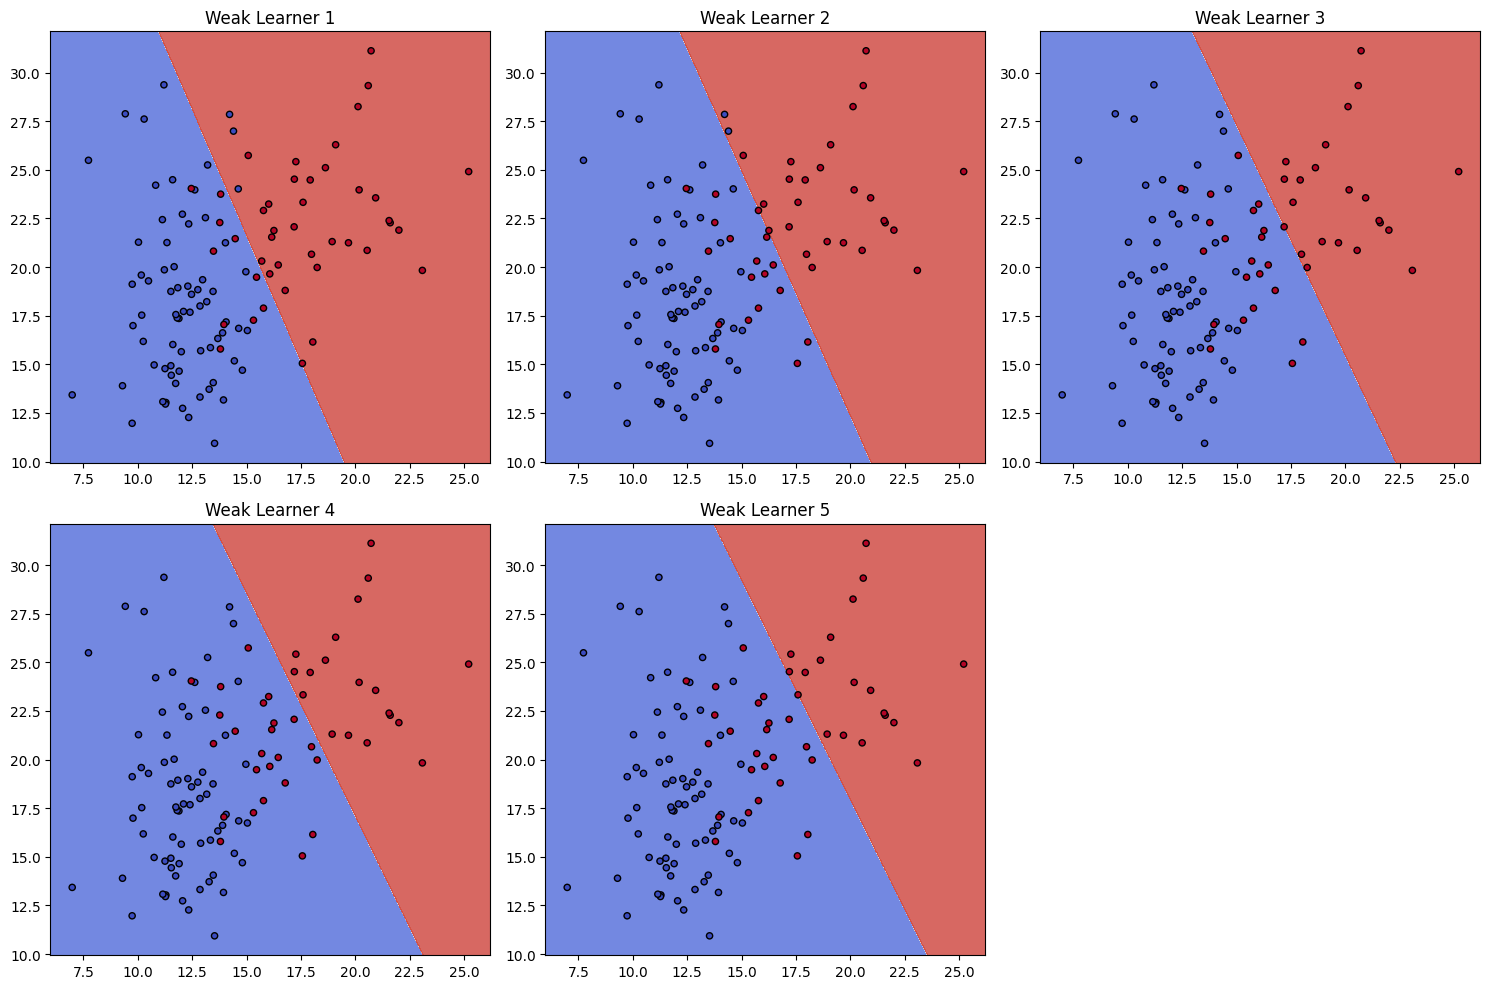

In [16]:
# Plot decision regions
plot_decision_regions(X_test[['Feature_1', 'Feature_2']], y_test, models, alphas)


In [18]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8859649122807017
